In [1]:
%load_ext tensorboard
# Import our dependencies
import tensorflow as tf 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import datetime
import os 
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow import keras
import io 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, MetaData, Table
from config import *

#  Import and read the charity_data.csv.
import pandas as pd 

In [2]:
engine= create_engine(database_url)
connection = engine.connect()

In [3]:
Confirmed_False_planets_df = pd.read_sql_table('false_planets', engine)
Confirmed_False_planets_df

,koi_name,exoplanet_archive_disposition,orbital_period,transit_epoch,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux_earth,transit_signal_to_noise,stellar_effective_temperature,stellar_surface_gravity,stellar_radius,ra,decimal_degrees,kepler_band
0,K00752.01,CONFIRMED,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,K00752.02,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,K00754.01,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
3,K00755.01,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
4,K00756.01,CONFIRMED,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7242,K08198.01,FALSE POSITIVE,373.893980,261.496800,0.963,27.66000,730.0,2.51,206.0,0.42,18.5,5263.0,4.574,0.699,290.93597,47.290730,14.911
7243,K07984.01,FALSE POSITIVE,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478
7244,K07985.01,FALSE POSITIVE,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082
7245,K07987.01,FALSE POSITIVE,0.681402,132.181750,0.147,0.86500,103.6,1.07,2218.0,5713.41,12.3,6173.0,4.447,1.041,294.16489,47.176281,15.385


In [4]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
%reload_ext tensorboard

In [5]:
TensorBoard(
    log_dir="logs",
    histogram_freq=0,
    write_graph=True,
    write_images=False,
    update_freq="epoch",
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None,
)

In [6]:
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    update_freq="epoch",
)

In [7]:
Confirmed_False_planets_df=Confirmed_False_planets_df.set_index('koi_name')
Confirmed_False_planets_df

,exoplanet_archive_disposition,orbital_period,transit_epoch,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux_earth,transit_signal_to_noise,stellar_effective_temperature,stellar_surface_gravity,stellar_radius,ra,decimal_degrees,kepler_band
koi_name,,,,,,,,,,,,,,,,
K00752.01,CONFIRMED,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
K00752.02,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
K00754.01,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
K00755.01,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
K00756.01,CONFIRMED,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K08198.01,FALSE POSITIVE,373.893980,261.496800,0.963,27.66000,730.0,2.51,206.0,0.42,18.5,5263.0,4.574,0.699,290.93597,47.290730,14.911
K07984.01,FALSE POSITIVE,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478
K07985.01,FALSE POSITIVE,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082


In [8]:
zero_one_df = Confirmed_False_planets_df['exoplanet_archive_disposition'].replace({'CONFIRMED':1, 'FALSE POSITIVE':0})
zero_one_df

koi_name
K00752.01    1
K00752.02    1
K00754.01    0
K00755.01    1
K00756.01    1
            ..
K08198.01    0
K07984.01    0
K07985.01    0
K07987.01    0
K07989.01    0
Name: exoplanet_archive_disposition, Length: 7247, dtype: int64

In [9]:
Confirmed_False_planets_df = Confirmed_False_planets_df.drop(columns = 'exoplanet_archive_disposition')
Confirmed_False_planets_df

,orbital_period,transit_epoch,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux_earth,transit_signal_to_noise,stellar_effective_temperature,stellar_surface_gravity,stellar_radius,ra,decimal_degrees,kepler_band
koi_name,,,,,,,,,,,,,,,
K00752.01,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
K00752.02,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
K00754.01,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
K00755.01,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
K00756.01,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K08198.01,373.893980,261.496800,0.963,27.66000,730.0,2.51,206.0,0.42,18.5,5263.0,4.574,0.699,290.93597,47.290730,14.911
K07984.01,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478
K07985.01,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082


In [10]:
new_planets_df = Confirmed_False_planets_df.merge(zero_one_df, left_index=True,right_index=True)
new_planets_df

,orbital_period,transit_epoch,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux_earth,transit_signal_to_noise,stellar_effective_temperature,stellar_surface_gravity,stellar_radius,ra,decimal_degrees,kepler_band,exoplanet_archive_disposition
koi_name,,,,,,,,,,,,,,,,
K00752.01,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,1
K00752.02,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,1
K00754.01,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597,0
K00755.01,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509,1
K00756.01,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K08198.01,373.893980,261.496800,0.963,27.66000,730.0,2.51,206.0,0.42,18.5,5263.0,4.574,0.699,290.93597,47.290730,14.911,0
K07984.01,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478,0
K07985.01,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082,0


In [11]:
# Split our preprocessed data into our features and target arrays
y = new_planets_df.exoplanet_archive_disposition
X = new_planets_df.drop(columns= ["exoplanet_archive_disposition"] )

# Split the preprocessed data into a training and testing dataset
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, random_state=42, stratify=y, test_size =0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, random_state=42,test_size =0.5 )

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=42))
classifier.fit(X_train, y_train)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)
X_val_test_scaled = X_scaler.transform(X_val_test)

C:\anaconda\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
C:\anaconda\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
C:\anaconda\envs\mlenv\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\anaconda\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
C:\anaconda\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature n

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 35

model = tf.keras.models.Sequential([

# First hidden layer
(
    tf.keras.layers.Dense(units=56, input_dim=number_input_features, activation="relu")
),

# Second hidden layer
(tf.keras.layers.Dense(units=16, activation="tanh")),
(tf.keras.layers.Dense(units=41, activation="tanh")),
(tf.keras.layers.Dense(units=46, activation="tanh")), 
(tf.keras.layers.Dense(units=46, activation="tanh")),  
(tf.keras.layers.Dense(units=16, activation="tanh")),      
# Output layer
(tf.keras.layers.Dense(units=1, activation="sigmoid"))])

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 56)                896       
                                                                 
 dense_1 (Dense)             (None, 16)                912       
                                                                 
 dense_2 (Dense)             (None, 41)                697       
                                                                 
 dense_3 (Dense)             (None, 46)                1932      
                                                                 
 dense_4 (Dense)             (None, 46)                2162      
                                                                 
 dense_5 (Dense)             (None, 16)                752       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [14]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val) , epochs=150, callbacks=[tensorboard_callback])

Epoch 1/150
182/182 [==============================] - 1s 4ms/step - loss: 0.4174 - accuracy: 0.8044 - val_loss: 0.3614 - val_accuracy: 0.8386
Epoch 2/150
182/182 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8532 - val_loss: 0.3349 - val_accuracy: 0.8566
Epoch 3/150
182/182 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.8610 - val_loss: 0.3198 - val_accuracy: 0.8566
Epoch 4/150
182/182 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.8725 - val_loss: 0.3196 - val_accuracy: 0.8510
Epoch 5/150
182/182 [==============================] - 1s 3ms/step - loss: 0.2968 - accuracy: 0.8742 - val_loss: 0.3097 - val_accuracy: 0.8634
Epoch 6/150
182/182 [==============================] - 0s 2ms/step - loss: 0.2857 - accuracy: 0.8792 - val_loss: 0.3153 - val_accuracy: 0.8690
Epoch 7/150
182/182 [==============================] - 0s 2ms/step - loss: 0.2774 - accuracy: 0.8846 - val_loss: 0.3074 - val_accuracy: 0.8648

Epoch 58/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.9281 - val_loss: 0.3145 - val_accuracy: 0.8717
Epoch 59/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9296 - val_loss: 0.3187 - val_accuracy: 0.8800
Epoch 60/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.9265 - val_loss: 0.3032 - val_accuracy: 0.8772
Epoch 61/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9310 - val_loss: 0.3119 - val_accuracy: 0.8648
Epoch 62/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9307 - val_loss: 0.2998 - val_accuracy: 0.8676
Epoch 63/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9312 - val_loss: 0.3052 - val_accuracy: 0.8703
Epoch 64/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9246 - val_loss: 0.3190 - val_accuracy:

Epoch 115/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9529 - val_loss: 0.3944 - val_accuracy: 0.8524
Epoch 116/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9572 - val_loss: 0.4512 - val_accuracy: 0.8566
Epoch 117/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1197 - accuracy: 0.9526 - val_loss: 0.4198 - val_accuracy: 0.8662
Epoch 118/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9577 - val_loss: 0.4131 - val_accuracy: 0.8717
Epoch 119/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9531 - val_loss: 0.4154 - val_accuracy: 0.8690
Epoch 120/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9545 - val_loss: 0.4196 - val_accuracy: 0.8579
Epoch 121/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1085 - accuracy: 0.9557 - val_loss: 0.4417 - val_ac

In [15]:
tensorboard --logdir logs/fit

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
prediction = model.predict(X_test_scaled)
y_pred = (prediction>0.5).astype(int)
true_df = y_true.to_frame("true")
pred_df = pd.DataFrame(prediction,columns=["prediction"]).set_index(y_true.index)
rounded_pred_df = pd.DataFrame(y_pred,columns=["Rounded Predictions"]).set_index(y_true.index)

In [17]:
pred_pred_df = pred_df.merge(rounded_pred_df, left_index=True,right_index=True)
true_pred_pred_df = true_df.merge(pred_pred_df, left_index=True,right_index=True)
true_pred_pred_df


,true,prediction,Rounded Predictions
koi_name,,,
K00109.01,0,0.974846,1
K00116.02,1,0.945744,1
K04736.01,0,0.000005,0
K01978.01,1,0.994931,1
K00767.01,1,0.999349,1
...,...,...,...
K01008.01,0,0.000003,0
K05442.01,0,0.004494,0
K04646.01,0,0.012611,0


In [18]:
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,414,57
Actual 1,34,220


<AxesSubplot:>

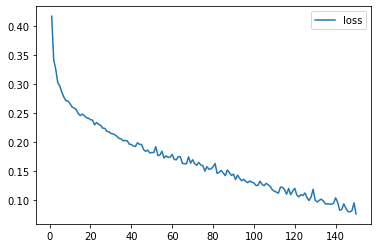

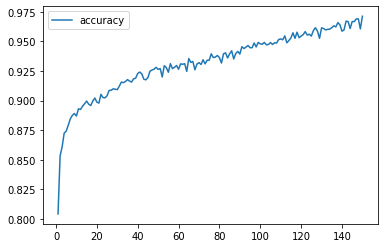

In [19]:
history_df = pd.DataFrame(fit_model.history)
history_df.index +=1
history_df.plot(y="loss")
history_df.plot(y="accuracy")

In [20]:
 print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       471
           1       0.79      0.87      0.83       254

    accuracy                           0.87       725
   macro avg       0.86      0.87      0.86       725
weighted avg       0.88      0.87      0.88       725



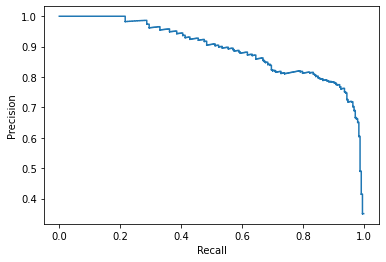

In [21]:
from sklearn.metrics import (precision_recall_curve,
                           PrecisionRecallDisplay)

precision, recall, _ = precision_recall_curve(y_true, prediction)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()